Starting CartPole training...
Episode 10: Recent 10 episodes average reward = 435.70
Episode 20: Recent 10 episodes average reward = 500.00
Episode 30: Recent 10 episodes average reward = 500.00
Episode 40: Recent 10 episodes average reward = 500.00
Episode 50: Recent 10 episodes average reward = 500.00

Training completed! Final average reward: 500.00
Generating final test animation...
Final test: Lasted 500 steps, Total reward: 500.0


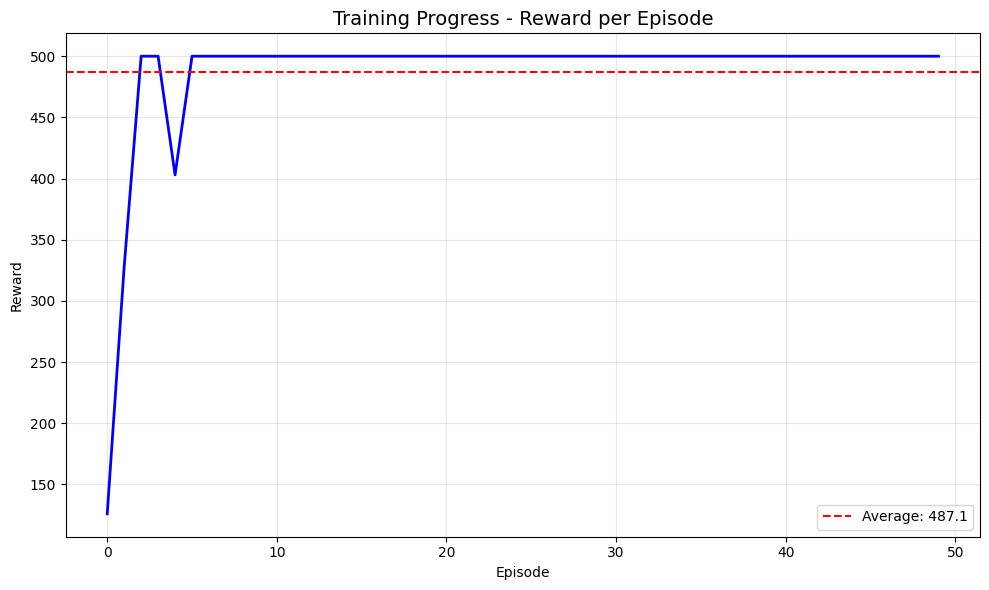

Creating animation...


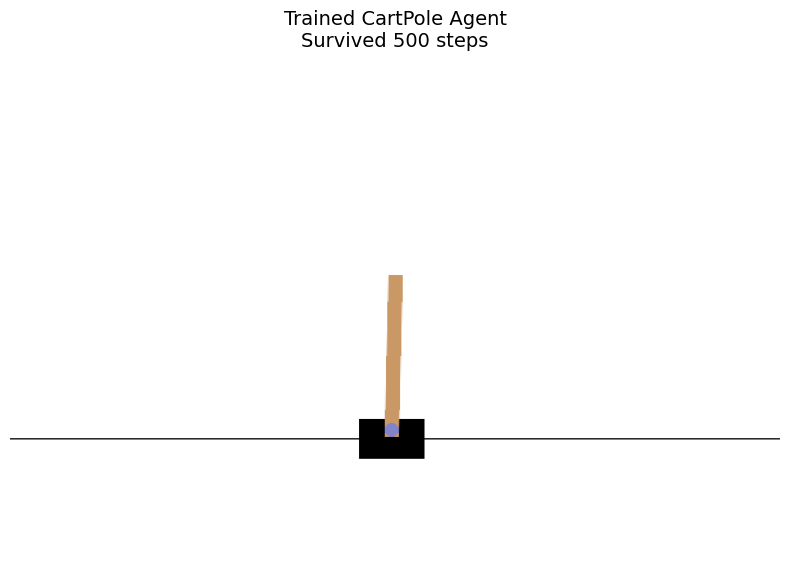

Saving animation as GIF...
Animation saved as 'cartpole_animation.gif'

=== Final Analysis ===
🎉 Congratulations! The cart has learned to balance!
   Able to maintain balance for over 500 steps - excellent performance!

CartPole final state:
- Last test duration: 500 steps
- Last test total reward: 500.0
- Training average reward: 487.14
- Reward improvement: +64.30 (last 10 vs first 10 episodes)

If you don't see the animation, try running in Jupyter notebook or save as GIF


In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
import warnings
warnings.filterwarnings('ignore')

print("Starting CartPole training...")

# Create environment
env = DummyVecEnv([lambda: gym.make("CartPole-v1")])
model = PPO("MlpPolicy", env, verbose=0, device="cpu")

# Training parameters
total_episodes = 50
timesteps_per_episode = 5000
episode_rewards = []

# Training loop
for episode in range(total_episodes):
    model.learn(total_timesteps=timesteps_per_episode, reset_num_timesteps=False)
    
    # Test current model performance
    test_env = gym.make("CartPole-v1")
    obs, info = test_env.reset()
    total_reward = 0
    done = False
    
    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, terminated, truncated, info = test_env.step(action)
        total_reward += reward
        done = terminated or truncated
    
    episode_rewards.append(total_reward)
    test_env.close()
    
    # Show progress every 10 episodes
    if (episode + 1) % 10 == 0:
        avg_reward = np.mean(episode_rewards[-10:])
        print(f"Episode {episode + 1}: Recent 10 episodes average reward = {avg_reward:.2f}")

print(f"\nTraining completed! Final average reward: {np.mean(episode_rewards[-10:]):.2f}")

# ======= Final test and animation part =======
print("Generating final test animation...")

# Create environment for animation
test_env = gym.make("CartPole-v1", render_mode="rgb_array")
obs, info = test_env.reset()
frames = []
done = False
step_count = 0
total_reward = 0

# Collect frames for animation
while not done and step_count < 1000:
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = test_env.step(action)
    total_reward += reward
    done = terminated or truncated
    
    # Render and store frame
    frame = test_env.render()
    frames.append(frame)
    step_count += 1

test_env.close()

print(f"Final test: Lasted {step_count} steps, Total reward: {total_reward}")

# Create separate figures for training progress and animation
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(episode_rewards, 'b-', linewidth=2)
ax1.set_title('Training Progress - Reward per Episode', fontsize=14)
ax1.set_xlabel('Episode')
ax1.set_ylabel('Reward')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=np.mean(episode_rewards), color='r', linestyle='--', 
           label=f'Average: {np.mean(episode_rewards):.1f}')
ax1.legend()

# Show training progress
plt.tight_layout()
plt.show()

# Create animation in separate figure
if len(frames) > 0:
    print("Creating animation...")
    
    fig2, ax2 = plt.subplots(figsize=(8, 6))
    ax2.set_title(f"Trained CartPole Agent\nSurvived {step_count} steps", fontsize=14)
    ax2.axis('off')
    
    # Initialize image
    im = ax2.imshow(frames[0])
    
    def animate_func(frame_idx):
        if frame_idx < len(frames):
            im.set_array(frames[frame_idx])
        return [im]
    
    # Create animation
    anim = animation.FuncAnimation(
        fig2, animate_func, frames=len(frames), 
        interval=50, blit=True, repeat=True
    )
    
    # For Jupyter notebooks, uncomment the line below:
    # from IPython.display import HTML
    # HTML(anim.to_jshtml())
    
    plt.tight_layout()
    plt.show()
    
    # Optional: Save animation as GIF (requires pillow: pip install pillow)
    try:
        print("Saving animation as GIF...")
        anim.save('cartpole_animation.gif', writer='pillow', fps=20)
        print("Animation saved as 'cartpole_animation.gif'")
    except:
        print("Could not save GIF (install pillow if needed)")
        
else:
    print("No frames collected for animation")

# Performance analysis
print("\n=== Final Analysis ===")
if step_count >= 500:
    print("🎉 Congratulations! The cart has learned to balance!")
    print("   Able to maintain balance for over 500 steps - excellent performance!")
elif step_count >= 200:
    print("✅ Good! The cart has basically learned to balance")
    print("   Although not very stable yet, there's significant improvement")
else:
    print("⚠️  The cart needs more training")
    print("   Consider increasing training episodes or adjusting hyperparameters")

print(f"\nCartPole final state:")
print(f"- Last test duration: {step_count} steps")
print(f"- Last test total reward: {total_reward}")
print(f"- Training average reward: {np.mean(episode_rewards):.2f}")

# Show reward improvement trend
if len(episode_rewards) >= 10:
    recent_avg = np.mean(episode_rewards[-10:])
    early_avg = np.mean(episode_rewards[:10])
    improvement = recent_avg - early_avg
    print(f"- Reward improvement: +{improvement:.2f} (last 10 vs first 10 episodes)")

print("\nIf you don't see the animation, try running in Jupyter notebook or save as GIF")

Generating final test animation and recording data...
Final test: Lasted 5000 steps, Total reward: 5000.0
✅ All training and test data saved to 'cartpole_training_data.npz'

📊 Data Summary:
- Total steps recorded: 5000
- Cart position range: [-0.027, 0.127]
- Cart velocity range: [-0.201, 0.193]
- Pole angle range: [-0.019, 0.018] radians
- Pole angular velocity range: [-0.294, 0.365] rad/s
- Actions taken: [2500 2500] (0=left, 1=right)


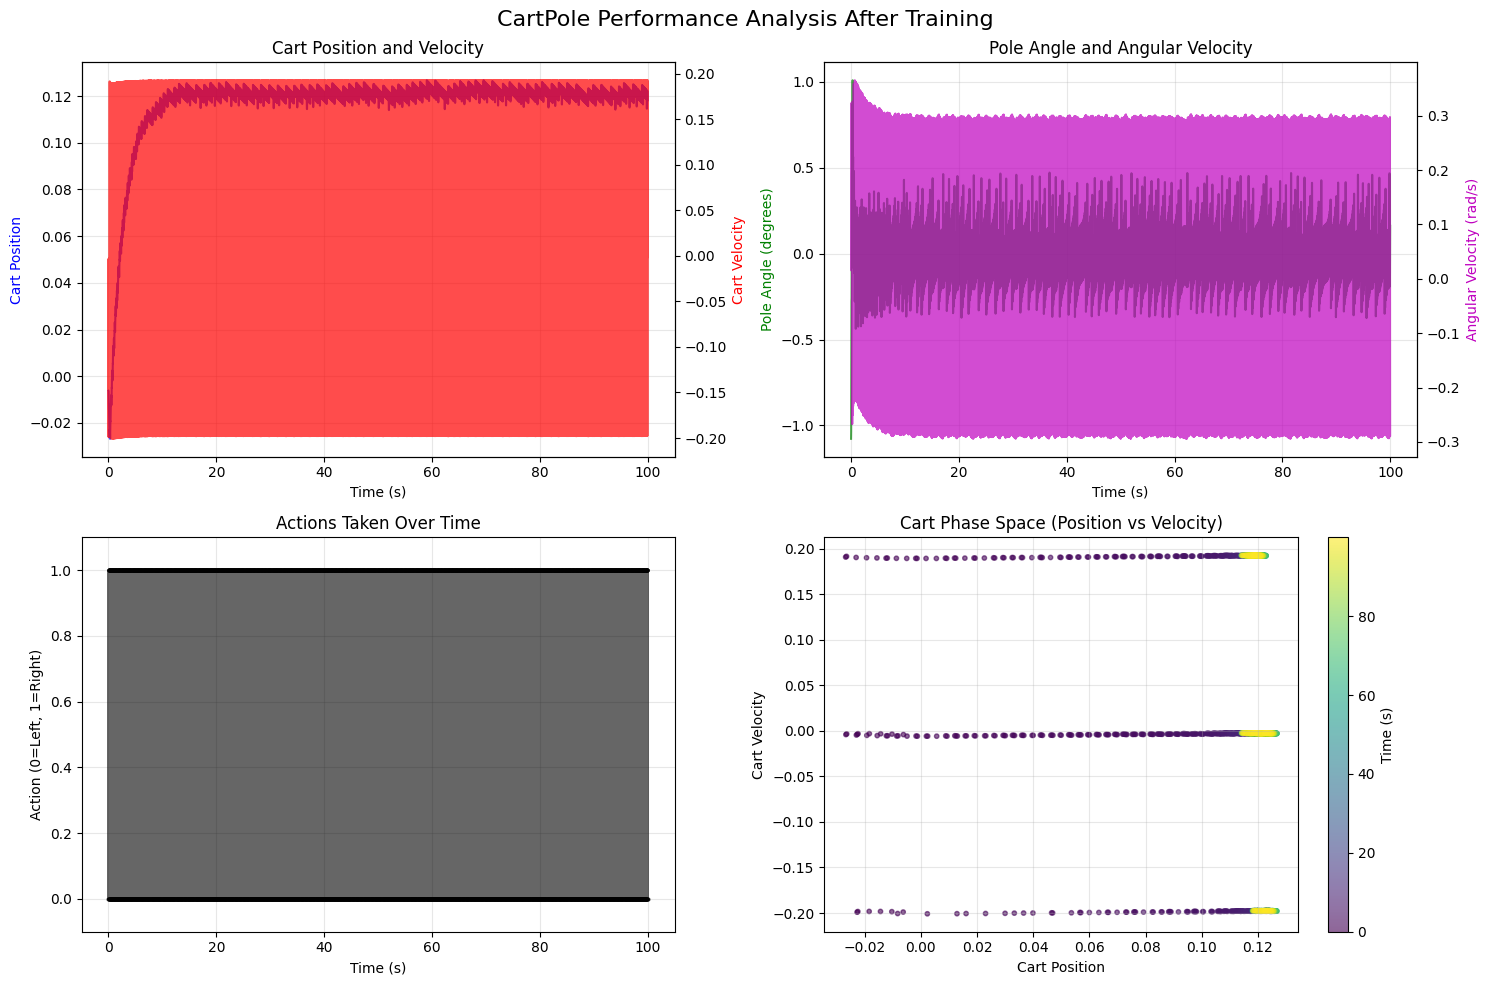

📈 Analysis plots generated showing system behavior over time

🔬 Performing Fourier Transform Analysis on Velocities...


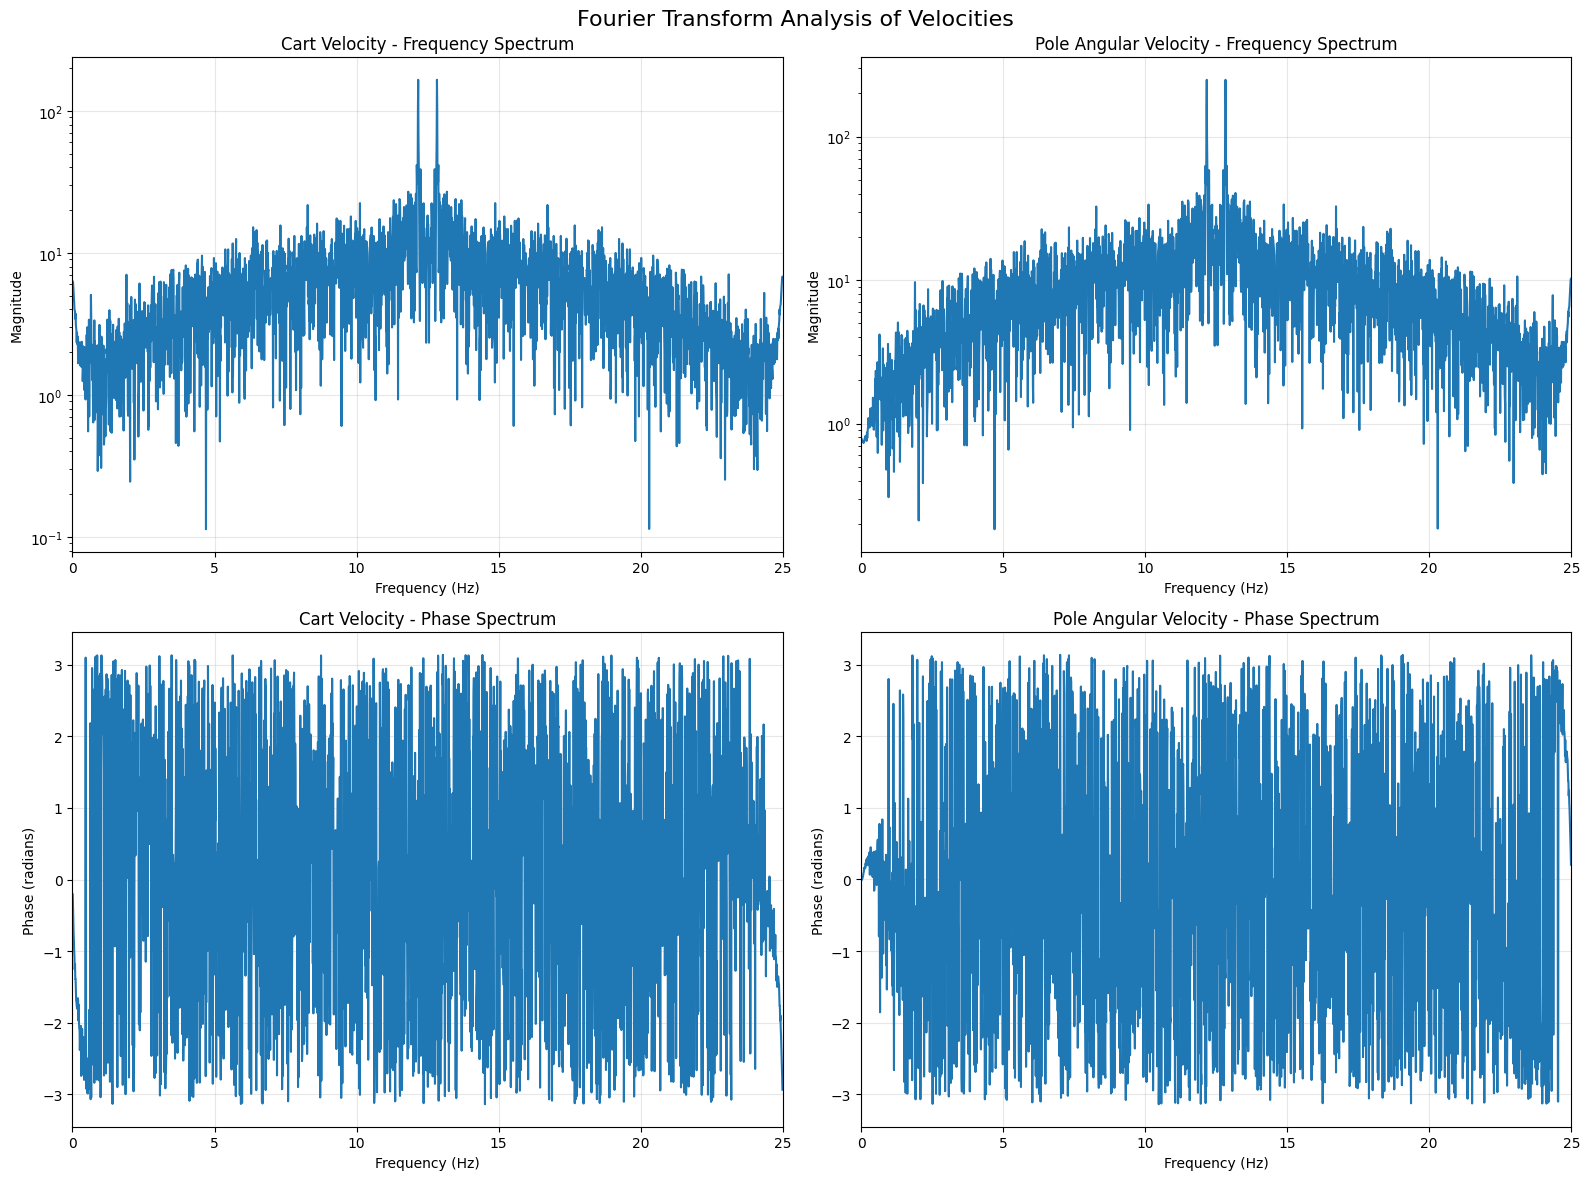

✅ FFT analysis data saved to 'cartpole_fft_analysis.npz'

📊 FFT Analysis Results:
- Sampling frequency: 50.0 Hz
- Frequency resolution: 0.010 Hz
- Maximum analyzable frequency (Nyquist): 25.0 Hz
- Total samples analyzed: 5000

🎯 Dominant Frequencies (>10% of peak magnitude):
Cart Velocity:
  - 8.28 Hz (magnitude: 2.17e+01)
  - 9.30 Hz (magnitude: 1.75e+01)
  - 9.34 Hz (magnitude: 1.70e+01)
  - 9.43 Hz (magnitude: 1.68e+01)
  - 9.80 Hz (magnitude: 1.81e+01)
Pole Angular Velocity:
  - 8.28 Hz (magnitude: 3.25e+01)
  - 9.30 Hz (magnitude: 2.61e+01)
  - 9.34 Hz (magnitude: 2.55e+01)
  - 9.43 Hz (magnitude: 2.52e+01)
  - 9.80 Hz (magnitude: 2.70e+01)

📈 Statistical Analysis:
Cart Velocity RMS: 0.1379
Pole Angular Velocity RMS: 0.2064
Cart Velocity Standard Deviation: 0.1379
Pole Angular Velocity Standard Deviation: 0.2064

🔍 Interpretation:
⚠️  Multiple oscillation modes detected.
   System may benefit from further tuning.

💾 Use this code to load FFT data later:
fft_data = np.load('cartpol

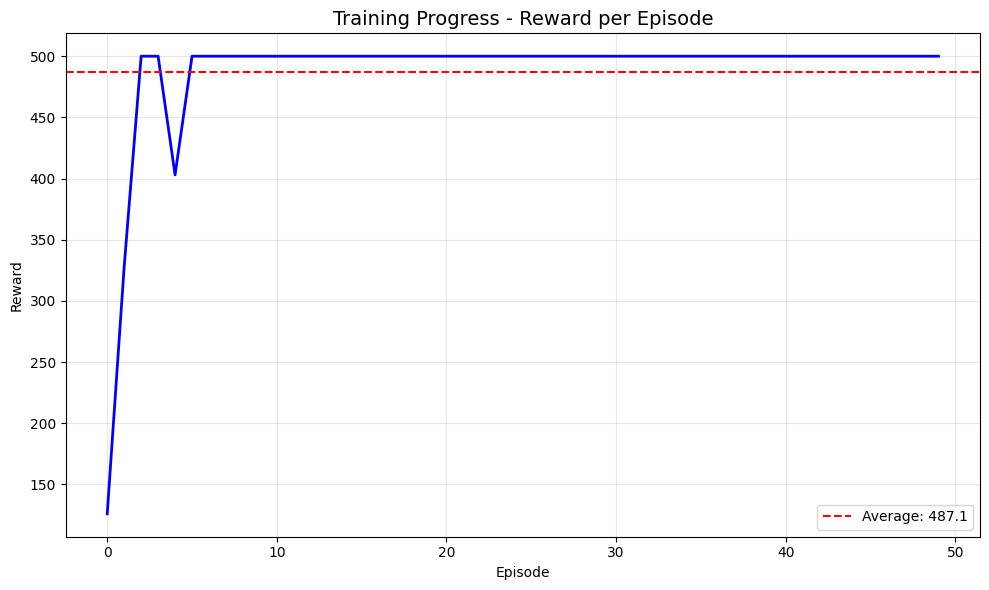

Creating animation and saving as GIF...
Saving animation as cartpole_trained_agent.gif...
✅ Animation successfully saved as 'cartpole_trained_agent.gif'
📁 File location: Current working directory
📊 GIF info: 5000 frames, 25 fps


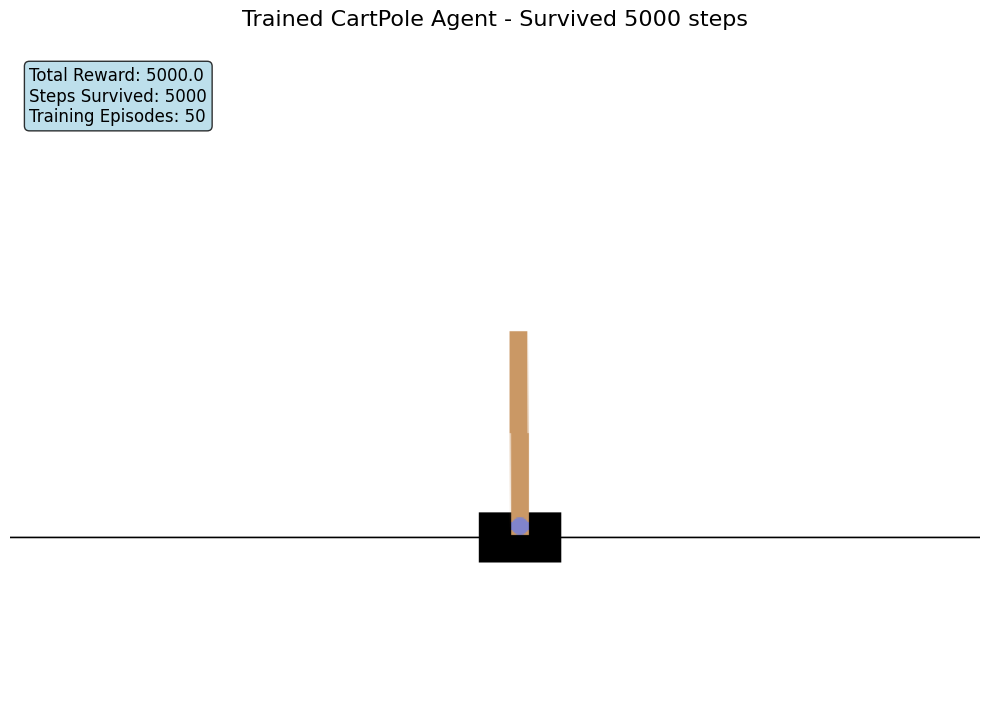

🖥️  Animation window opened (if display available)

=== Final Analysis ===
🎉 Congratulations! The cart has learned to balance!
   Able to maintain balance for over 500 steps - excellent performance!

CartPole final state:
- Last test duration: 5000 steps
- Last test total reward: 5000.0
- Training average reward: 487.14
- Reward improvement: +64.30 (last 10 vs first 10 episodes)


In [2]:
print("Generating final test animation and recording data...")

# Create environment for animation
test_env = gym.make("CartPole-v1", render_mode="rgb_array")
Total_TIME =  5000
test_env._max_episode_steps = Total_TIME  # 設定更高的限制
obs, info = test_env.reset()
frames = []
done = False
step_count = 0
total_reward = 0

# Data recording arrays
cart_positions = []
cart_velocities = []
pole_angles = []
pole_angular_velocities = []
actions_taken = []
rewards_received = []
timestamps = []
pole_tip_offsets = []  # 在前面定義


# Collect frames and data for analysis
while not done and step_count < Total_TIME:
    # Record current state before action
    cart_position = obs[0]      # Cart position
    cart_velocity = obs[1]      # Cart velocity  
    pole_angle = obs[2]         # Pole angle (radians)
    pole_angular_velocity = obs[3]  # Pole angular velocity
    
    # Store state data
    cart_positions.append(cart_position)
    cart_velocities.append(cart_velocity)
    pole_angles.append(pole_angle)
    pole_angular_velocities.append(pole_angular_velocity)
    timestamps.append(step_count * 0.02)  # Assuming 50Hz (0.02s per step)
    # 在 while 迴圈內的每一步加這行：
    pole_tip_offset = test_env.unwrapped.length * np.sin(pole_angle)
    pole_tip_offsets.append(pole_tip_offset)
    
    # Get action from trained model
    action, _ = model.predict(obs, deterministic=True)
    actions_taken.append(action)
    
    # Take action and observe result
    obs, reward, terminated, truncated, info = test_env.step(action)
    rewards_received.append(reward)
    total_reward += reward
    done = terminated or truncated
    
    # Render and store frame
    frame = test_env.render()
    frames.append(frame)
    step_count += 1

test_env.close()

print(f"Final test: Lasted {step_count} steps, Total reward: {total_reward}")

# Convert lists to numpy arrays
cart_positions = np.array(cart_positions)
cart_velocities = np.array(cart_velocities)
pole_angles = np.array(pole_angles)
pole_angular_velocities = np.array(pole_angular_velocities)
actions_taken = np.array(actions_taken)
rewards_received = np.array(rewards_received)
timestamps = np.array(timestamps)
pole_tip_offsets = np.array(pole_tip_offsets)

recorded_data = {
    'cart_positions': cart_positions,
    'cart_velocities': cart_velocities,
    'pole_angles': pole_angles,
    'pole_angular_velocities': pole_angular_velocities,
    'actions_taken': actions_taken,
    'rewards_received': rewards_received,
    'timestamps': timestamps,
    'total_steps': step_count,
    'total_reward': total_reward,
    'pole_tip_offsets': pole_tip_offsets,
    'episode_rewards': np.array(episode_rewards)
}
# Save data to numpy file
data_filename = 'cartpole_training_data.npz'
np.savez(data_filename, **recorded_data)
print(f"✅ All training and test data saved to '{data_filename}'")

# Display data summary
print(f"\n📊 Data Summary:")
print(f"- Total steps recorded: {len(cart_positions)}")
print(f"- Cart position range: [{cart_positions.min():.3f}, {cart_positions.max():.3f}]")
print(f"- Cart velocity range: [{cart_velocities.min():.3f}, {cart_velocities.max():.3f}]")
print(f"- Pole angle range: [{pole_angles.min():.3f}, {pole_angles.max():.3f}] radians")
print(f"- Pole angular velocity range: [{pole_angular_velocities.min():.3f}, {pole_angular_velocities.max():.3f}] rad/s")
print(f"- Actions taken: {np.bincount(actions_taken)} (0=left, 1=right)")

# Create additional analysis plots
fig3, axes = plt.subplots(2, 2, figsize=(15, 10))
fig3.suptitle('CartPole Performance Analysis After Training', fontsize=16)

# Plot 1: Cart position and velocity
axes[0,0].plot(timestamps, cart_positions, 'b-', label='Position', alpha=0.7)
ax_twin1 = axes[0,0].twinx()
ax_twin1.plot(timestamps, cart_velocities, 'r-', label='Velocity', alpha=0.7)
axes[0,0].set_xlabel('Time (s)')
axes[0,0].set_ylabel('Cart Position', color='b')
ax_twin1.set_ylabel('Cart Velocity', color='r')
axes[0,0].set_title('Cart Position and Velocity')
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Pole angle and angular velocity
axes[0,1].plot(timestamps, np.degrees(pole_angles), 'g-', label='Angle (deg)', alpha=0.7)
ax_twin2 = axes[0,1].twinx()
ax_twin2.plot(timestamps, pole_angular_velocities, 'm-', label='Angular Velocity', alpha=0.7)
axes[0,1].set_xlabel('Time (s)')
axes[0,1].set_ylabel('Pole Angle (degrees)', color='g')
ax_twin2.set_ylabel('Angular Velocity (rad/s)', color='m')
axes[0,1].set_title('Pole Angle and Angular Velocity')
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Actions over time
axes[1,0].plot(timestamps, actions_taken, 'ko-', markersize=2, alpha=0.6)
axes[1,0].set_xlabel('Time (s)')
axes[1,0].set_ylabel('Action (0=Left, 1=Right)')
axes[1,0].set_title('Actions Taken Over Time')
axes[1,0].grid(True, alpha=0.3)
axes[1,0].set_ylim(-0.1, 1.1)

# Plot 4: Phase space (position vs velocity)
scatter = axes[1,1].scatter(cart_positions, cart_velocities, c=timestamps, 
                          cmap='viridis', alpha=0.6, s=10)
axes[1,1].set_xlabel('Cart Position')
axes[1,1].set_ylabel('Cart Velocity')
axes[1,1].set_title('Cart Phase Space (Position vs Velocity)')
axes[1,1].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[1,1], label='Time (s)')

plt.tight_layout()
plt.show()

print(f"📈 Analysis plots generated showing system behavior over time")

# ======= Fourier Transform Analysis =======
print(f"\n🔬 Performing Fourier Transform Analysis on Velocities...")

# Calculate sampling parameters
dt = 0.02  # Time step (50Hz sampling rate)
fs = 1/dt  # Sampling frequency (50 Hz)
N = len(cart_velocities)  # Number of samples

# Perform FFT on cart velocity
cart_vel_fft = np.fft.fft(cart_velocities)
cart_vel_freqs = np.fft.fftfreq(N, dt)
cart_vel_magnitude = np.abs(cart_vel_fft)
cart_vel_phase = np.angle(cart_vel_fft)

# Perform FFT on pole angular velocity
pole_angvel_fft = np.fft.fft(pole_angular_velocities)
pole_angvel_freqs = np.fft.fftfreq(N, dt)
pole_angvel_magnitude = np.abs(pole_angvel_fft)
pole_angvel_phase = np.angle(pole_angvel_fft)

# Only keep positive frequencies for plotting
positive_freq_idx = cart_vel_freqs > 0
cart_pos_freqs = cart_vel_freqs[positive_freq_idx]
cart_pos_magnitude = cart_vel_magnitude[positive_freq_idx]
cart_pos_phase = cart_vel_phase[positive_freq_idx]

pole_pos_freqs = pole_angvel_freqs[positive_freq_idx]
pole_pos_magnitude = pole_angvel_magnitude[positive_freq_idx]
pole_pos_phase = pole_angvel_phase[positive_freq_idx]

# Create Fourier analysis plots
fig4, axes = plt.subplots(2, 2, figsize=(16, 12))
fig4.suptitle('Fourier Transform Analysis of Velocities', fontsize=16)

# Cart velocity FFT magnitude
axes[0,0].semilogy(cart_pos_freqs, cart_pos_magnitude)
axes[0,0].set_xlabel('Frequency (Hz)')
axes[0,0].set_ylabel('Magnitude')
axes[0,0].set_title('Cart Velocity - Frequency Spectrum')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].set_xlim(0, min(25, fs/2))  # Show up to 25 Hz or Nyquist frequency

# Pole angular velocity FFT magnitude
axes[0,1].semilogy(pole_pos_freqs, pole_pos_magnitude)
axes[0,1].set_xlabel('Frequency (Hz)')
axes[0,1].set_ylabel('Magnitude')
axes[0,1].set_title('Pole Angular Velocity - Frequency Spectrum')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].set_xlim(0, min(25, fs/2))

# Cart velocity FFT phase
axes[1,0].plot(cart_pos_freqs, cart_pos_phase)
axes[1,0].set_xlabel('Frequency (Hz)')
axes[1,0].set_ylabel('Phase (radians)')
axes[1,0].set_title('Cart Velocity - Phase Spectrum')
axes[1,0].grid(True, alpha=0.3)
axes[1,0].set_xlim(0, min(25, fs/2))

# Pole angular velocity FFT phase
axes[1,1].plot(pole_pos_freqs, pole_pos_phase)
axes[1,1].set_xlabel('Frequency (Hz)')
axes[1,1].set_ylabel('Phase (radians)')
axes[1,1].set_title('Pole Angular Velocity - Phase Spectrum')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].set_xlim(0, min(25, fs/2))

plt.tight_layout()
plt.show()

# Find dominant frequencies
def find_dominant_frequencies(freqs, magnitudes, threshold_ratio=0.1):
    """Find frequencies with significant magnitude"""
    max_magnitude = np.max(magnitudes)
    threshold = max_magnitude * threshold_ratio
    dominant_indices = magnitudes > threshold
    return freqs[dominant_indices], magnitudes[dominant_indices]

# Analyze dominant frequencies (excluding DC component at 0 Hz)
cart_dom_freqs, cart_dom_mags = find_dominant_frequencies(
    cart_pos_freqs[cart_pos_freqs > 0.1], 
    cart_pos_magnitude[cart_pos_freqs > 0.1]
)

pole_dom_freqs, pole_dom_mags = find_dominant_frequencies(
    pole_pos_freqs[pole_pos_freqs > 0.1], 
    pole_pos_magnitude[pole_pos_freqs > 0.1]
)

# Calculate power spectral density
cart_psd = cart_vel_magnitude**2 / N
pole_psd = pole_angvel_magnitude**2 / N

# Save FFT data to numpy file
fft_data = {
    'cart_velocity_fft_magnitude': cart_vel_magnitude,
    'cart_velocity_fft_phase': cart_vel_phase,
    'cart_velocity_frequencies': cart_vel_freqs,
    'pole_angvel_fft_magnitude': pole_angvel_magnitude,
    'pole_angvel_fft_phase': pole_angvel_phase,
    'pole_angvel_frequencies': pole_angvel_freqs,
    'sampling_frequency': fs,
    'time_step': dt,
    'cart_power_spectral_density': cart_psd,
    'pole_power_spectral_density': pole_psd
}

fft_filename = 'cartpole_fft_analysis.npz'
np.savez(fft_filename, **fft_data)
print(f"✅ FFT analysis data saved to '{fft_filename}'")

# Display FFT analysis results
print(f"\n📊 FFT Analysis Results:")
print(f"- Sampling frequency: {fs} Hz")
print(f"- Frequency resolution: {fs/N:.3f} Hz")
print(f"- Maximum analyzable frequency (Nyquist): {fs/2} Hz")
print(f"- Total samples analyzed: {N}")

print(f"\n🎯 Dominant Frequencies (>10% of peak magnitude):")
print(f"Cart Velocity:")
if len(cart_dom_freqs) > 0:
    for freq, mag in zip(cart_dom_freqs[:5], cart_dom_mags[:5]):  # Show top 5
        print(f"  - {freq:.2f} Hz (magnitude: {mag:.2e})")
else:
    print("  - No significant periodic components found")

print(f"Pole Angular Velocity:")
if len(pole_dom_freqs) > 0:
    for freq, mag in zip(pole_dom_freqs[:5], pole_dom_mags[:5]):  # Show top 5
        print(f"  - {freq:.2f} Hz (magnitude: {mag:.2e})")
else:
    print("  - No significant periodic components found")

# Calculate RMS values
cart_vel_rms = np.sqrt(np.mean(cart_velocities**2))
pole_angvel_rms = np.sqrt(np.mean(pole_angular_velocities**2))

print(f"\n📈 Statistical Analysis:")
print(f"Cart Velocity RMS: {cart_vel_rms:.4f}")
print(f"Pole Angular Velocity RMS: {pole_angvel_rms:.4f}")
print(f"Cart Velocity Standard Deviation: {np.std(cart_velocities):.4f}")
print(f"Pole Angular Velocity Standard Deviation: {np.std(pole_angular_velocities):.4f}")

# Spectral analysis interpretation
print(f"\n🔍 Interpretation:")
if len(cart_dom_freqs) == 0 and len(pole_dom_freqs) == 0:
    print("✅ Excellent control! No significant oscillations detected.")
    print("   The system maintains smooth, non-periodic motion.")
elif max(len(cart_dom_freqs), len(pole_dom_freqs)) <= 2:
    print("✅ Good control with minimal oscillations.")
    print("   Few dominant frequencies suggest stable control.")
else:
    print("⚠️  Multiple oscillation modes detected.")
    print("   System may benefit from further tuning.")

print(f"\n💾 Use this code to load FFT data later:")
print(f"fft_data = np.load('{fft_filename}')")
print(f"cart_freqs = fft_data['cart_velocity_frequencies']")
print(f"cart_magnitude = fft_data['cart_velocity_fft_magnitude']")

# Create separate figures for training progress and animation
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(episode_rewards, 'b-', linewidth=2)
ax1.set_title('Training Progress - Reward per Episode', fontsize=14)
ax1.set_xlabel('Episode')
ax1.set_ylabel('Reward')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=np.mean(episode_rewards), color='r', linestyle='--', 
           label=f'Average: {np.mean(episode_rewards):.1f}')
ax1.legend()

# Show training progress
plt.tight_layout()
plt.show()

# Create and save animation as GIF
if len(frames) > 0:
    print("Creating animation and saving as GIF...")
    
    # Create figure for animation
    fig2, ax2 = plt.subplots(figsize=(10, 8))
    ax2.set_title(f"Trained CartPole Agent - Survived {step_count} steps", fontsize=16, pad=20)
    ax2.axis('off')
    
    # Add performance text
    performance_text = f"Total Reward: {total_reward}\nSteps Survived: {step_count}\nTraining Episodes: {total_episodes}"
    ax2.text(0.02, 0.98, performance_text, transform=ax2.transAxes, fontsize=12,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
    
    # Initialize image display
    im = ax2.imshow(frames[0])
    
    def animate_func(frame_idx):
        if frame_idx < len(frames):
            im.set_array(frames[frame_idx])
        return [im]
    
    # Create animation with better settings
    anim = animation.FuncAnimation(
        fig2, animate_func, frames=len(frames), 
        interval=40, blit=True, repeat=True
    )
    
    # Save as GIF with high quality
    try:
        gif_filename = 'cartpole_trained_agent.gif'
        print(f"Saving animation as {gif_filename}...")
        
        # Use PillowWriter for better quality
        writer = animation.PillowWriter(fps=25, metadata=dict(artist='CartPole-PPO'), bitrate=1800)
        anim.save(gif_filename, writer=writer)
        
        print(f"✅ Animation successfully saved as '{gif_filename}'")
        print(f"📁 File location: Current working directory")
        print(f"📊 GIF info: {len(frames)} frames, 25 fps")
        
    except Exception as e:
        print(f"❌ Error saving GIF: {e}")
        print("💡 Try installing pillow: pip install pillow")
        
        # Fallback: try saving with different writer
        try:
            print("Trying alternative save method...")
            anim.save('cartpole_backup.gif', writer='imagemagick', fps=20)
            print("✅ Backup saved as 'cartpole_backup.gif'")
        except:
            print("❌ Could not save animation. Please install pillow or imagemagick.")
    
    # Show animation in window (if display available)
    try:
        plt.tight_layout()
        plt.show(block=False)  # Non-blocking show
        print("🖥️  Animation window opened (if display available)")
    except:
        print("🖥️  No display available, but GIF saved successfully")
        
    # Keep figure alive for a moment
    plt.pause(2)
    plt.close(fig2)
    
else:
    print("❌ No frames collected for animation")
    print("💡 Check if gymnasium and rendering are properly installed")

# Performance analysis
print("\n=== Final Analysis ===")
if step_count >= 500:
    print("🎉 Congratulations! The cart has learned to balance!")
    print("   Able to maintain balance for over 500 steps - excellent performance!")
elif step_count >= 200:
    print("✅ Good! The cart has basically learned to balance")
    print("   Although not very stable yet, there's significant improvement")
else:
    print("⚠️  The cart needs more training")
    print("   Consider increasing training episodes or adjusting hyperparameters")

print(f"\nCartPole final state:")
print(f"- Last test duration: {step_count} steps")
print(f"- Last test total reward: {total_reward}")
print(f"- Training average reward: {np.mean(episode_rewards):.2f}")

# Show reward improvement trend
if len(episode_rewards) >= 10:
    recent_avg = np.mean(episode_rewards[-10:])
    early_avg = np.mean(episode_rewards[:10])
    improvement = recent_avg - early_avg
    print(f"- Reward improvement: +{improvement:.2f} (last 10 vs first 10 episodes)")



In [3]:
pole_half_length = test_env.unwrapped.length
pole_full_length = pole_half_length * 2

print(f"Pole half length: {pole_half_length}")
print(f"Pole full length: {pole_full_length}")

Pole half length: 0.5
Pole full length: 1.0


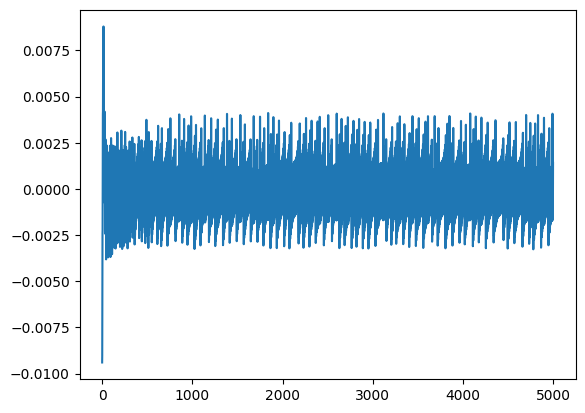

In [4]:
plt.plot(pole_tip_offsets 
)

In [5]:
10000*0.02

200.0

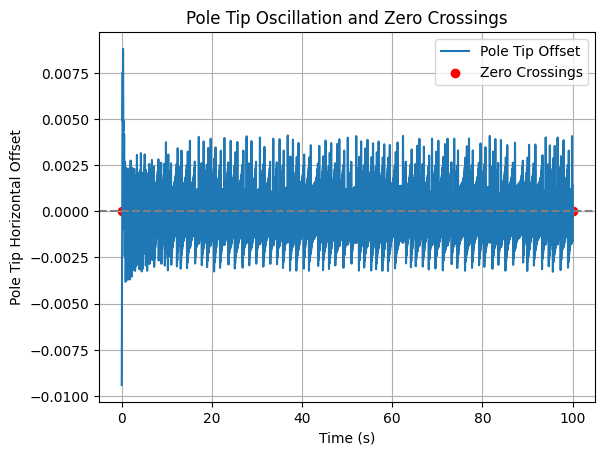

In [6]:
zero_crossing_indices = np.where(np.diff(np.sign(pole_tip_offsets)) != 0)[0]

# 加上 1，因為 np.diff 產生的是 N-1 長度
zero_crossing_times = timestamps[zero_crossing_indices + 1]
plt.plot(timestamps, pole_tip_offsets, label='Pole Tip Offset')
plt.scatter(zero_crossing_times, np.zeros_like(zero_crossing_times), color='red', label='Zero Crossings')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Time (s)")
plt.ylabel("Pole Tip Horizontal Offset")
plt.legend()
plt.title("Pole Tip Oscillation and Zero Crossings")
plt.grid(True)
plt.show()

In [7]:
zero_crossing_times

array([ 0.12,  0.48,  0.52, ..., 99.8 , 99.92, 99.96], shape=(2209,))

(array([  0.,   0.,   0.,   0.,   0.,  18.,   0., 900.,   0.,   2.,   0.,
         75.,   0.,  10.,   0.,  96.,   0.,   0.,   0.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
        0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
        0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
        0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
        0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24

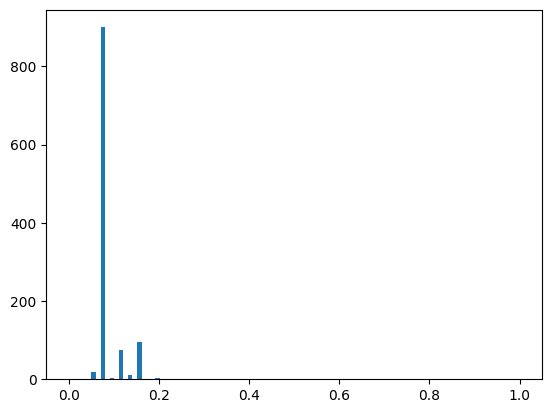

In [8]:
# Step 1: 取偶數 index 的過零時間點
even_crossing_times = zero_crossing_times[::2]

# Step 2: 計算每個週期的時間長度
periods = np.diff(even_crossing_times)
min_p = min(periods)
max_p = max(periods)
plt.hist(periods, bins=np.linspace(0, 1,100))

In [9]:
periods

array([0.4 , 0.2 , 0.2 , ..., 0.08, 0.08, 0.16], shape=(1104,))

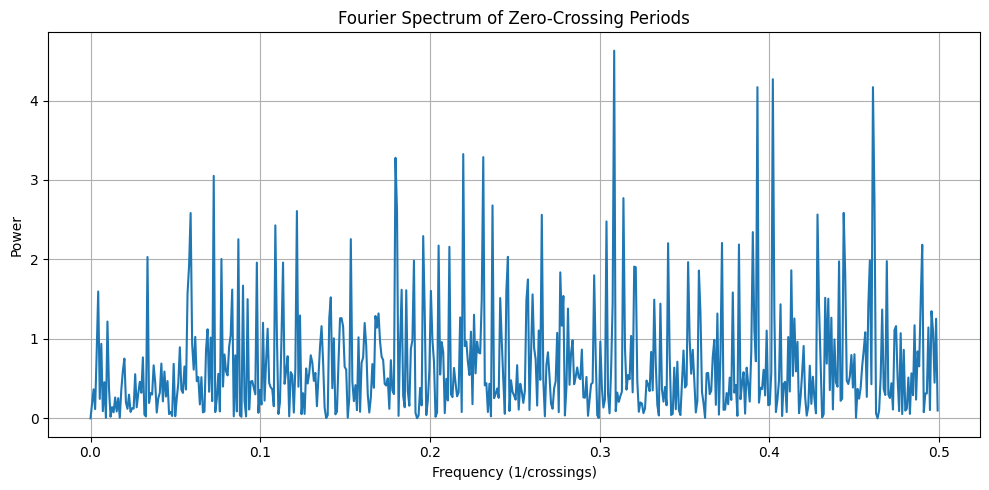

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# 假設你已有 zero_crossing_times，如：
# zero_crossing_times = np.array([...])

# Step 1: 取偶數 index 的過零時間點
even_crossing_times = zero_crossing_times[::2]
even_crossing_times = even_crossing_times[2:]
# Step 2: 計算每個週期的時間長度
periods = np.diff(even_crossing_times)  # 相鄰時間差，應該接近週期
N = len(periods)
dt = 1  # 每個樣本對應一個週期，不需要真實時間尺度

# Step 3: FFT 分析
yf = fft(periods - np.mean(periods))  # 去除 DC 分量 (均值)
xf = fftfreq(N, dt)

# 只取正頻率部分
xf_pos = xf[:N//2]
power_spectrum = np.abs(yf[:N//2])**2

# Step 4: 繪圖
plt.figure(figsize=(10, 5))
plt.plot(xf_pos, power_spectrum)
plt.xlabel("Frequency (1/crossings)")
plt.ylabel("Power")
plt.title("Fourier Spectrum of Zero-Crossing Periods")
plt.grid(True)
plt.tight_layout()
plt.show()


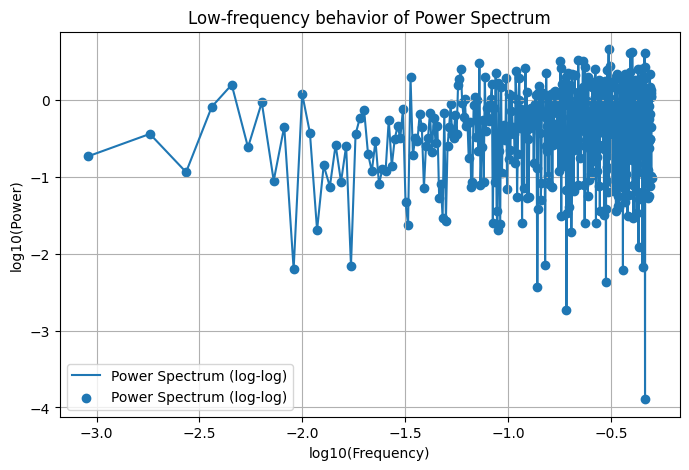

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# 假設 you have `periods` = np.diff(even_crossing_times)
periods = periods - np.mean(periods)  # 去掉均值
N = len(periods)
dt = 1  # index 間隔
Q = 800
yf = fft(periods)
xf = fftfreq(N, dt)
xf = xf[:N//2]
power = np.abs(yf[:N//2])**2

# 避免 log(0)，加個 epsilon
epsilon = 1e-12
log_xf = np.log10(xf[1:Q] + epsilon)
log_power = np.log10(power[1:Q] + epsilon)

plt.figure(figsize=(8, 5))
plt.plot(log_xf, log_power, label='Power Spectrum (log-log)')
plt.scatter(log_xf, log_power, label='Power Spectrum (log-log)')
plt.xlabel('log10(Frequency)')
plt.ylabel('log10(Power)')
plt.title('Low-frequency behavior of Power Spectrum')
plt.grid(True)
plt.legend()
plt.show()


In [12]:
xf[1:Q]

array([0.0009058 , 0.00181159, 0.00271739, 0.00362319, 0.00452899,
       0.00543478, 0.00634058, 0.00724638, 0.00815217, 0.00905797,
       0.00996377, 0.01086957, 0.01177536, 0.01268116, 0.01358696,
       0.01449275, 0.01539855, 0.01630435, 0.01721014, 0.01811594,
       0.01902174, 0.01992754, 0.02083333, 0.02173913, 0.02264493,
       0.02355072, 0.02445652, 0.02536232, 0.02626812, 0.02717391,
       0.02807971, 0.02898551, 0.0298913 , 0.0307971 , 0.0317029 ,
       0.0326087 , 0.03351449, 0.03442029, 0.03532609, 0.03623188,
       0.03713768, 0.03804348, 0.03894928, 0.03985507, 0.04076087,
       0.04166667, 0.04257246, 0.04347826, 0.04438406, 0.04528986,
       0.04619565, 0.04710145, 0.04800725, 0.04891304, 0.04981884,
       0.05072464, 0.05163043, 0.05253623, 0.05344203, 0.05434783,
       0.05525362, 0.05615942, 0.05706522, 0.05797101, 0.05887681,
       0.05978261, 0.06068841, 0.0615942 , 0.0625    , 0.0634058 ,
       0.06431159, 0.06521739, 0.06612319, 0.06702899, 0.06793

In [13]:
log_power 

array([-1.21454711e+00,  1.04807487e-02, -2.49493632e-01,  2.39200508e-01,
        4.29539904e-01, -1.08013112e-01,  2.10467226e-01, -6.55167732e-01,
       -1.63236476e-02, -7.49841202e-01,  2.62092405e-01, -4.18565240e-01,
       -5.78364416e-01, -2.34510691e+00, -9.44945842e-01, -6.12743127e-01,
       -6.44200363e-01, -1.00532028e+00, -7.90230635e-01,  5.59077394e-02,
        1.71914169e-01,  1.97554284e-01, -1.61804373e-01, -3.89075733e-01,
       -2.11308234e-01, -4.36918595e-01, -6.47372092e-01, -9.99253157e-01,
        1.58358309e-01, -2.35199865e-01, -3.22747694e-02,  4.18508089e-02,
       -6.04278161e-02,  1.67652702e-01, -7.58812870e-01, -8.88337763e-01,
        1.90986173e-01, -2.84554878e-01, -1.26903537e-02, -9.58676877e-02,
        1.46016841e-01,  1.98422314e-02, -4.60886718e-01, -3.57924599e-01,
       -2.24900690e-01,  9.92230534e-02, -9.15280568e-01,  1.38304748e-01,
       -1.76566709e-01, -1.99190657e-02, -7.31392759e-01, -9.22564195e-01,
       -6.29706722e-01, -

In [14]:
env = gym.make("CartPole-v1")
print(env.spec)  # 查看環境規格

EnvSpec(id='CartPole-v1', entry_point='gymnasium.envs.classic_control.cartpole:CartPoleEnv', reward_threshold=475.0, nondeterministic=False, max_episode_steps=500, order_enforce=True, disable_env_checker=False, kwargs={}, namespace=None, name='CartPole', version=1, additional_wrappers=(), vector_entry_point='gymnasium.envs.classic_control.cartpole:CartPoleVectorEnv')


In [16]:
freqs

array([ 0.        ,  0.00833333,  0.01666667,  0.025     ,  0.03333333,
        0.04166667,  0.05      ,  0.05833333,  0.06666667,  0.075     ,
        0.08333333,  0.09166667,  0.1       ,  0.10833333,  0.11666667,
        0.125     ,  0.13333333,  0.14166667,  0.15      ,  0.15833333,
        0.16666667,  0.175     ,  0.18333333,  0.19166667,  0.2       ,
        0.20833333,  0.21666667,  0.225     ,  0.23333333,  0.24166667,
        0.25      ,  0.25833333,  0.26666667,  0.275     ,  0.28333333,
        0.29166667,  0.3       ,  0.30833333,  0.31666667,  0.325     ,
        0.33333333,  0.34166667,  0.35      ,  0.35833333,  0.36666667,
        0.375     ,  0.38333333,  0.39166667,  0.4       ,  0.40833333,
        0.41666667,  0.425     ,  0.43333333,  0.44166667,  0.45      ,
        0.45833333,  0.46666667,  0.475     ,  0.48333333,  0.49166667,
       -0.5       , -0.49166667, -0.48333333, -0.475     , -0.46666667,
       -0.45833333, -0.45      , -0.44166667, -0.43333333, -0.42